# Descriptive statistics
So far we encountered the mean and the standard deviation as descriptive statistics. These two quantities are  sufficient to fully describe normally distributed data!

Alas, not all data is normally distributed...

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

plt.style.use('ncb.mplstyle')

## Measures of central tendency: Mean, median, mode
- Mean: Average value: $1/N \sum_i^N x_i$
- Median: Value at the midpoint of the distribution, such that there is an equal probability of observing values below and above the median (50% of the samples are below the median, 50% above).
- Mode: Most frequent value for a discrete distribution or the point at which a continuous pdf attains its max value.

For a normal distribution, mean, median, and mode are identical.

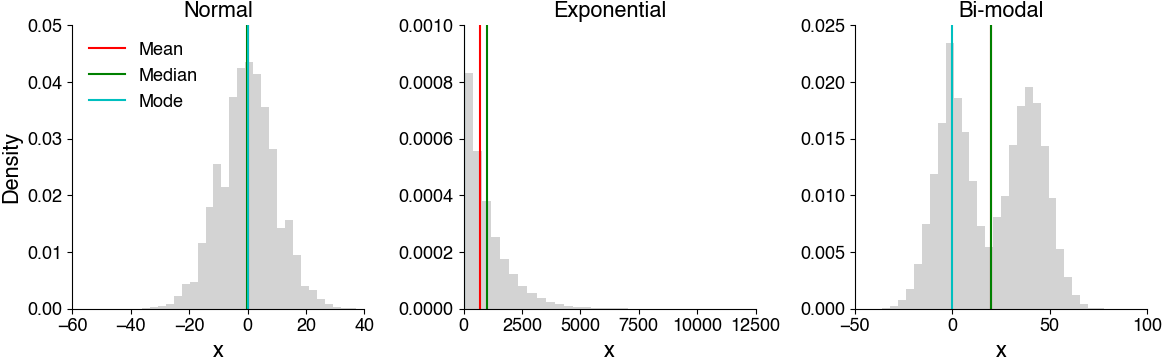

In [3]:
# mean/median/mode for gauss, bi-modal, log-normal - always plot histogram!
pdfs = [np.random.randn(100_000), np.random.exponential(100, size=100_000), np.concatenate((np.random.randn(50_000), np.random.randn(50_000)+4))]
pdfs = [(pdf * 10).astype(int) for pdf in pdfs]
pdf_names = ['Normal', 'Exponential', 'Bi-modal']

plt.figure(figsize=(12, 4))
for cnt, (pdf, name) in enumerate(zip(pdfs, pdf_names)):
    plt.subplot(1,3,cnt+1)
    plt.hist(pdf, bins=32, density=True, color='lightgrey')
    plt.axvline(np.nanmedian(pdf), c='r', label='Mean')
    plt.axvline(np.nanmean(pdf), c='g', label='Median')
    plt.axvline(scipy.stats.mode(pdf)[0], c='c', label='Mode')
    plt.title(name)
    plt.xlabel('x')
    if cnt == 0:
        plt.ylabel('Density')
        plt.legend()

plt.tight_layout()
plt.savefig('fig/5.02_descriptive_stats1.png')
plt.show()

## Measures of dispersion: Variance, standard deviation and inter-quartile range
- Variance: $\sigma^2 = 1/(N-1) \sum_i^N (x_i - \hat{x})^2$ ($\hat{x}$ is the mean of all x)
- Standard deviation is the square root of the variance: $\sigma = \sqrt{\sigma^2}$. Useful for normal data.
- Inter-quartile range (IQR): Quartiles split the data into 4 parts each with equal number of samples - the first quartile contains the 25% of samples with the lowest values, the last quartile contains the 25% of the samples with the highest values. The interquartile range is the range of data that spans the central 50% of the distribution. Useful for non-normal (asymmetrical) data.

__Note__ The variance measures the average squared distance of the samples from the sapmle mean. Why then use a normalizaton factor of $N-1$, instead of $N$ as expected for an average? Turns out the values obtained with normalization $N$ are biased - you will explore this in the exercise.

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
/var/folders/zr/6ql4dzjx0tq8mpzht_2dwh480000gn/T/ipykernel_16321/2088512525.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.plot([np.nanmean(pdf) - np.nanstd(pdf), np.nanmean(pdf) + np.nanstd(pdf)], [0.0023, 0.0023], c='r', label='68%, $\pm\sigma$')
/var/folders/zr/6ql4dzjx0tq8mpzht_2dwh480000gn/T/ipykernel_16321/2088512525.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.plot([np.nanmean(pdf) - 2*np.nanstd(pdf), np.nanmean(pdf) + 2*np.nanstd(pdf)], [0.0006, 0.0006], c='orange', label='95%, $\pm2\sigma$')
/var/folders/zr/6ql4dzjx0tq8mpzht_2dwh480000gn/T/ipykernel_16321

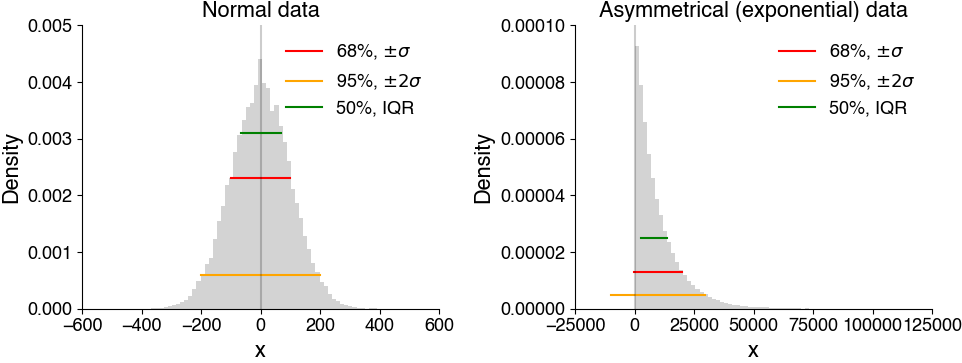

In [4]:
# mean/median/mode for gauss, bi-modal, log-normal - always plot histogram!
pdfs = [np.random.randn(100_000)]#, np.random.exponential(100, size=100_000), np.concatenate((np.random.randn(50_000), np.random.randn(50_000)+4))]
pdfs = [(pdf * 100).astype(int) for pdf in pdfs]
pdf_names = ['Normal', 'Exponential', 'Bi-modal']

plt.figure(figsize=(10, 4))
for cnt, (pdf, name) in enumerate(zip(pdfs, pdf_names)):
    plt.subplot(1,2,1)
    plt.hist(pdf, bins=64, density=True, color='lightgrey')
    plt.plot([np.nanmean(pdf) - np.nanstd(pdf), np.nanmean(pdf) + np.nanstd(pdf)], [0.0023, 0.0023], c='r', label='68%, $\pm\sigma$')
    plt.plot([np.nanmean(pdf) - 2*np.nanstd(pdf), np.nanmean(pdf) + 2*np.nanstd(pdf)], [0.0006, 0.0006], c='orange', label='95%, $\pm2\sigma$')
    plt.axvline(0, c='k', alpha=0.2)
    plt.plot([np.percentile(pdf, 25),  np.percentile(pdf, 75)], [0.0031, 0.0031], c='g', label='50%, IQR')

    plt.title('Normal data')
    plt.xlabel('x')
    if cnt == 0:
        plt.ylabel('Density')
        plt.legend()

# mean/median/mode for gauss, bi-modal, log-normal - always plot histogram!
pdfs = [np.random.exponential(100, size=100_000)]
pdfs = [(pdf * 100).astype(int) for pdf in pdfs]
pdf_names = ['Normal', 'Exponential', 'Bi-modal']

# plt.figure(figsize=(12, 4))
for cnt, (pdf, name) in enumerate(zip(pdfs, pdf_names)):
    plt.subplot(1,2,2)
    plt.hist(pdf, bins=64, density=True, color='lightgrey')
    plt.plot([np.nanmean(pdf) - np.nanstd(pdf), np.nanmean(pdf) + np.nanstd(pdf)], [0.000013, 0.000013], c='r', label='68%, $\pm\sigma$')
    plt.plot([np.nanmean(pdf) - 2*np.nanstd(pdf), np.nanmean(pdf) + 2*np.nanstd(pdf)], [0.000005, 0.000005], c='orange', label='95%, $\pm2\sigma$')
    plt.axvline(0, c='k', alpha=0.2)
    plt.plot([np.percentile(pdf, 25),  np.percentile(pdf, 75)], [0.000025, 0.000025], c='g', label='50%, IQR')
    plt.title('Asymmetrical (exponential) data')
    plt.xlabel('x')
    if cnt == 0:
        plt.ylabel('Density')
        plt.legend()
plt.tight_layout()
plt.savefig('fig/5.02_descriptive_stats2.png')
plt.show()

### Mini Exercise
- Visualize the distribution of the data in x
- Show the mean, median, and mode of the distribution as vertical lines. Why is the mean greater than the median? Why is the mode smaller than the mean?

In [26]:
x = np.random.weibull(1.4, (100_000))  # generate 10k random numbers from a probability distribution

# your solution here

## Percentiles
Median and quartiles are special cases of percentiles.
Is the value at or below which a given percentage of all samples falls.

- The median is the 50th percentile - 50% of all samples fall below the median.
- The first quartile is the 25th percentile - 25% of all samples fall below the quartile.
- 99% of all samples fall below the 99th percentile.

## Skewness and kurtosis

The shape of a Normal distribution is fully described by the mean and the variance. However, non-normal distributions may require more measures to describe them - two commonly used ones are the skewness and the kurtosis.

### Skewness
Skewness measures the assymmetry of a distribution. Negative skewness means the left tail is longer, Positive skewness means the right tail is longer. Positively skewed distributions arise often when the values are bounded by 0 from below (for instance for count distributions (Poisson, Binomial)) - the values cannot grow beyond 0 into the negative, which cuts off the left tail, but they can grow into the positve. Skewness is 0 for a normal distribution.

One way to define it is: $s = 1/N \sum_i^N (x_i - \hat{x})^3 / \sigma^{3/2}$.

The distributions in the two leftmost panels all have the same mean and standard deviation, but different skewness. The rightmost panel shows a Poisson distribution, which is often used for spike counts and therefore restricted to positive integer values. It has a positive skew.

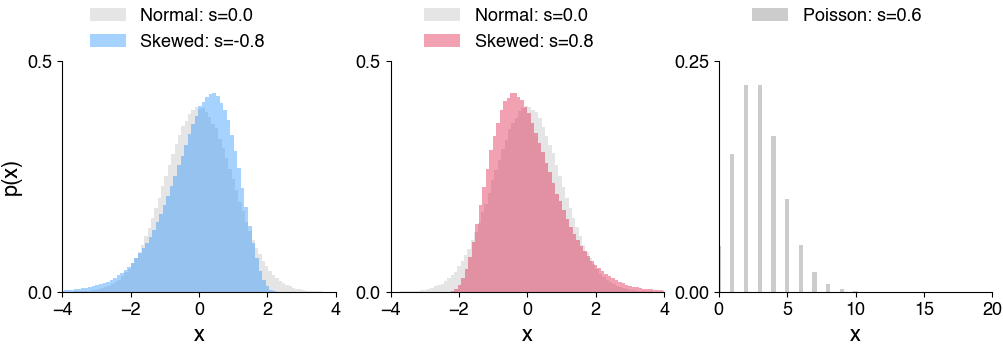

In [31]:
plt.figure(figsize=(12, 3))
for cnt, (col, skewness) in enumerate(zip(['dodgerblue', 'crimson'], [-0.8, 0.8])):
    plt.subplot(1,3,cnt+1)
    data = scipy.stats.pearson3.rvs(loc=0, scale=1, skew=0,  size=1_000_000)
    plt.hist(data, bins=100, alpha=0.1, color='k', density=True, label='Normal: s=0.0')

    data = scipy.stats.pearson3.rvs(loc=0, scale=1, skew=skewness,  size=1_000_000)
    plt.hist(data, bins=100, alpha=0.4, color=col, density=True, label=f"Skewed: s={scipy.stats.skew(data):1.1f}")
    plt.xlim(-4, 4)
    plt.xlabel('x')
    if cnt==0:
        plt.ylabel('p(x)')
    plt.yticks([0, 0.5])
    plt.legend(bbox_to_anchor=(0.8, 1.3))

plt.subplot(1,3,3)
x = np.arange(0, 20)
rv = scipy.stats.poisson(3)
data = rv.pmf(x)
plt.bar(x, data, alpha=0.2, color='k', width=0.3, label=f"Poisson: s={rv.stats(moments='s'):1.1f}")
plt.legend(bbox_to_anchor=(0.8, 1.3))
plt.xlim(0)
plt.xlabel('x')
plt.yticks([0, 0.25])

plt.savefig('fig/5.02_descriptive_stats3.png')
plt.show()

### Kurtosis
The kurtosis measures how heavy the tails are - the heavier the tails, the more extreme values, and the larger the kurtosis.

One way to define the kurtosis is: $k = 1/N \sum_i^N (x_i - \hat{x})^4 / \sigma^2$. 

The kurtosis is strictly positive and has a value of 3.0 for a normal distribution.

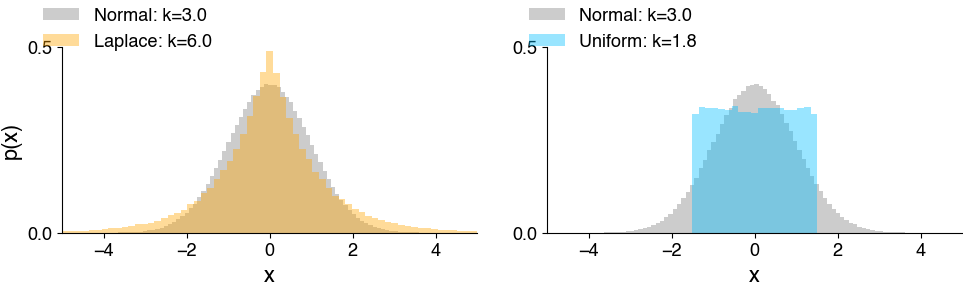

In [32]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis

bins = np.linspace(-5, 5, 64)
distnames = ['laplace', 'uniform']
colors = ['orange', 'deepskyblue']

plt.figure(figsize=(10, 3.5))
for cnt, (distname, color) in enumerate(zip(distnames, colors)):
    plt.subplot(1, 2, cnt+1)
    data = np.random.randn(1_000_000)
    plt.hist(data, bins=100, alpha=0.2, color='k', density=True, label='Normal: k=3.0')

    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-1.5, scale=3)
    else:
        dist = getattr(stats, distname)
        plt.ylabel('p(x)')
    data = dist.rvs(size=100_000)
    kur = kurtosis(data, fisher=False)

    plt.hist(data, bins=bins, label=f"{distname.capitalize()}: k={kur:1.1f}", color=color, alpha=0.4, density=True)
    plt.legend(bbox_to_anchor=(0.4, 1.3))
    plt.xlabel('x')
    plt.yticks([0, 0.5])
    plt.xlim(bins[0], bins[-1])

plt.tight_layout()
plt.savefig('fig/5.02_descriptive_stats4.png')
plt.show()

## Properties of a Normal distribution

The descriptive statistics of a Normal distribution have the following properties:

- mean, median, and mode are identical
- the skewness is 0.0
- the kurtosis is 3.0

Substantial deviations from these properties indicate that the distribution is _not_ Normal.

Is a distribution that matches the 3 properties listed above guaranteed to by Normal?
